In [1240]:
import tensorflow as tf
import imageio
import natsort
import glob
import PIL
import IPython
import numpy as np
import matplotlib.pyplot as plt
from factorVAE.model import CVAE
import train
from tensorflow_probability import distributions as tfd
from beta_VAE.dataset import preprocess_images
from tensorflow.linalg import matvec
from tensorflow_addons.image import rotate
import os
import random
import pandas as pd

In [915]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./beta_VAE/image/2_28/normal/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [916]:
def generate_and_save_images(predictions, degree, dire):
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    file_dir = './image/'+ dire
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir +'/image_at_epoch_{:04d}.png'.format(degree))
    plt.close()


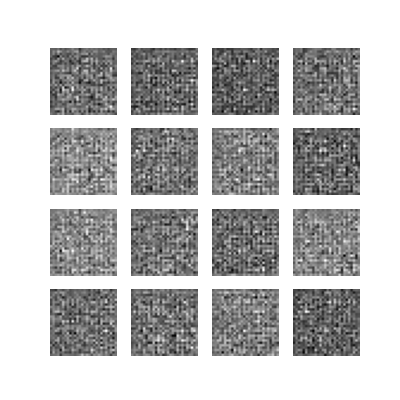

In [917]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [1128]:
model = CVAE(latent_dim=8, beta=3)
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.restore("./beta_VAE/checkpoints/3_2/new_test/ckpt-1")

In [1153]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
test_images = preprocess_images(test_images)

In [1013]:
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(10000).batch(32))
train_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(60000).batch(32))
num_examples_to_generate = 16

In [1120]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]
for train_batch in train_dataset.take(1):
    train_sample = train_batch[0:num_examples_to_generate, :, :, :]

In [1000]:
def generate_images(data):
    fig = plt.figure(figsize=(4, 4))
    for i in range(data.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# original image

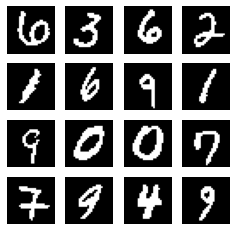

In [1046]:
generate_images(test_sample)

# After Model translate

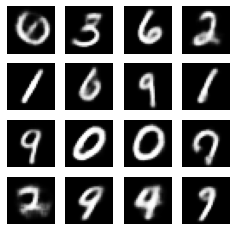

In [1047]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
generate_images(predictions)

In [1048]:
mean, logvar = model.encode(test_sample)
r_m = np.identity(model.latent_dim)
z = model.reparameterize(mean, logvar)
for i in range (10, 180, 10):  
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.sample(rota_z)
    generate_and_save_images(phi_z, i, 'test1')

In [1049]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


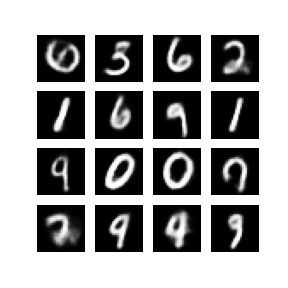

In [1050]:
embed.embed_file(anim_file)

In [1036]:
for i in range (10, 120, 10):
    theta = np.radians(i)
    r_x = rotate(test_sample, theta)
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.sample(rota_z)
    generate_and_save_images(phi_z, i, 'test2')

In [1037]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test2/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


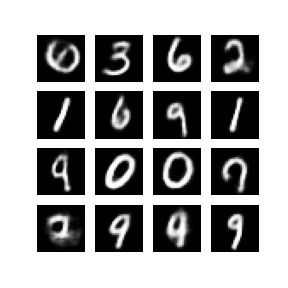

In [1038]:
embed.embed_file(anim_file)

In [169]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test_dir1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [809]:
for i in range(6, 10):
    model = CVAE(latent_dim=8, beta=1)
    checkpoint = tf.train.Checkpoint(model=model)
    checkpoint.restore("./factorVAE/checkpoints/2_27/gamma" + str(i) + "/ckpt-10")
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    for j in range(10, 120, 10):
        theta = np.radians(j)
        c, s = np.cos(theta), np.sin(theta)
        r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
        rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
        phi_z = model.decode(rota_z)
        generate_and_save_images(phi_z, j, 'test3' + "/beta_test" + str(i))

In [814]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test3/beta_test7/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


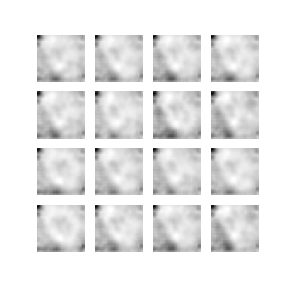

In [815]:
embed.embed_file(anim_file)

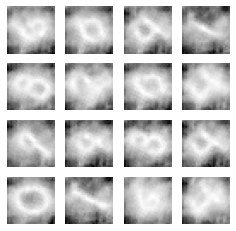

In [989]:
ori_mean, ori_logvar = model.encode(test_sample)
o_z = model.reparameterize(ori_mean, ori_logvar)
o_degree = np.arctan(o_z[:, 1]/o_z[:, 0])/np.pi * 180
theta = 40
degree = np.radians(theta)
r_x = rotate(test_sample, degree)
r_mean, r_logvar = model.encode(r_x)
r_z = model.reparameterize(r_mean, r_logvar)
r_degree = np.arctan(r_z[:, 1]/r_z[:, 0])/np.pi * 180
c, s = np.cos(degree), np.sin(degree)
r_m = np.identity(8)
r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
new_degree = matvec(tf.cast(r_m, dtype=tf.float32), r_z)
n_degree = np.arctan(new_degree[:, 1]/new_degree[:, 0])/np.pi * 180
r_x = model.decode(new_degree)
generate_images(r_x)

In [958]:
print(n_degree - r_degree)

[-40.       -40.000004 -40.       -40.       -40.       -39.999996
 -40.000004 -40.       -40.       -39.999996 -40.       -40.000004
 -40.       -40.       -40.000004 -40.      ]


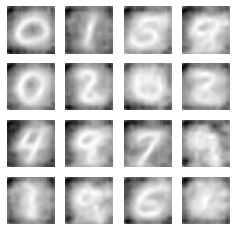

In [1010]:
ori_mean, ori_logvar = model.encode(test_sample)
o_z = model.reparameterize(ori_mean, ori_logvar)
o_degree = np.arctan(o_z[:, 1]/o_z[:, 0])/np.pi * 180
theta = 120
degree = np.radians(theta)
r_x = rotate(test_sample, degree)
r_mean, r_logvar = model.encode(r_x)
r_z = model.reparameterize(r_mean, r_logvar)
r_degree = np.arctan(r_z[:, 1]/r_z[:, 0])/np.pi * 180
c, s = np.cos(degree), np.sin(degree)
r_m = np.identity(8)
r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, -s], [s, c]
new_degree = matvec(tf.cast(r_m, dtype=tf.float32), r_z)
r_x = model.samp(new_degree)
generate_images(r_x)

In [944]:
cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y_ture)

In [948]:
-tf.reduce_sum(cross_ent,  axis=[1, 2, 3])

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([-137.91296 ,  -63.083916, -147.13637 ,  -85.9905  , -234.781   ,
       -122.76519 , -159.58122 , -177.49197 , -169.2854  , -149.00671 ,
        -59.81517 , -134.75038 ,  -74.72758 , -206.2127  , -105.48096 ,
        -52.988846], dtype=float32)>

In [964]:
theta = 40
degree = np.radians(theta)
ori_mean, ori_logvar = model.encode(test_sample)
o_z = model.reparameterize(ori_mean, ori_logvar)
o_degree = np.arctan(o_z[:, 1]/o_z[:, 0])/np.pi * 180
r_m = np.identity(8)
c, s = np.cos(degree), np.sin(degree)
r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, -s], [s, c]
new_degree = matvec(tf.cast(r_m, dtype=tf.float32), o_z)
n_degree = np.arctan(new_degree[:, 1]/new_degree[:, 0])/np.pi * 180
print(n_degree - o_degree)

[-140.       -140.       -140.       -140.         40.         40.000008
 -140.       -140.       -140.       -140.       -139.99998    40.000008
 -140.       -139.99998  -140.       -140.      ]


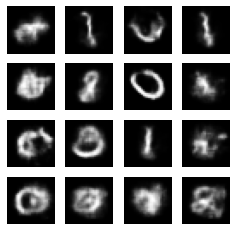

In [1053]:
theta = 140
degree = np.radians(theta)
new_sample = rotate(train_sample, degree)
mean, logvar = model.encode(new_sample)
z = model.reparameterize(mean, logvar)
x = model.sample(z)
generate_images(x)

In [586]:
(data_set, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [1059]:
random_vector_for_generation = tf.random.normal(
        shape=[num_examples_to_generate, 8])

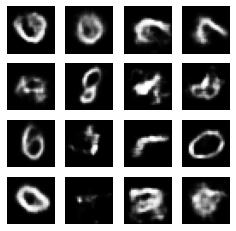

In [1060]:
test_x = model.sample(random_vector_for_generation)
generate_images(test_x)

In [593]:
def calculate_inception_score(p_yx, eps=1E-16):
 # calculate p(y)
 p_y = expand_dims(p_yx.mean(axis=0), 0)
 # kl divergence for each image
 kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
 # sum over classes
 sum_kl_d = kl_d.sum(axis=1)
 # average over images
 avg_kl_d = mean(sum_kl_d)
 # undo the logs
 is_score = exp(avg_kl_d)
 return is_score

(1000, 28, 28, 1)

In [1099]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

In [1218]:
from math import floor
from tensorflow.keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from numpy import expand_dims
def calculate_inception_score(images, n_split=10, eps=1E-16):
 # load inception v3 model
    model = InceptionV3(classes=10)
 # enumerate splits of images/predictions
    scores = list()
    n_part = floor(images.shape[0] / n_split)
    for i in range(n_split):
     # retrieve images
        ix_start, ix_end = i * n_part, (i+1) * n_part
        subset = images[ix_start:ix_end]
     # convert from uint8 to float32
        subset = tf.cast(subset, tf.float32)
     # scale images to the required size
        subset = scale_images(subset, (299,299,3))
     # pre-process images, scale to [-1,1]
        subset = preprocess_input(subset)
     # predict p(y|x)
        p_yx = model.predict(subset)
     # calculate p(y)
        p_y = expand_dims(p_yx.mean(axis=0), 0)
     # calculate KL divergence using log probabilities
        kl_d = p_yx * (np.log(p_yx + eps) - np.log(p_y + eps))
     # sum over classes
        sum_kl_d = kl_d.sum(axis=1)
     # average over images
        avg_kl_d = np.mean(sum_kl_d)
     # undo the log
        is_score = np.exp(avg_kl_d)
     # store
        scores.append(is_score)
     # average across images
    is_avg, is_std = np.mean(scores), np.std(scores)
    return is_avg, is_std

In [1219]:
calculate_inception_score(test_images)

ValueError: If using `weights` as `"imagenet"` with `include_top` as true, `classes` should be 1000

In [1133]:
test2 = model.sample(tf.random.normal(
        shape=[num_examples_to_generate, 8]))

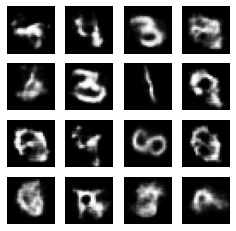

In [1134]:
generate_images(test2)

In [1159]:
class Classifier(tf.keras.Model):
    def __init__(self, shape):
        super(Classifier, self).__init__()
        self.shape = shape
        self.model = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(self.shape)),
                tf.keras.layers.Conv2D(
                    filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(
                    filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(64, activation='relu'),
                # No activation
                tf.keras.layers.Dense(10, activation='softmax'),
            ]
        )

    def call(self, X):
        return self.model(X)


    def mnist_score(self, X, n_split=10, eps=1E-16):
        scores = list()
        n_part = floor(X.shape[0] / n_split)
        for i in range(n_split):
            # retrieve images
            ix_start, ix_end = i * n_part, (i + 1) * n_part
            subset = X[ix_start:ix_end]
            # convert from uint8 to float32
            subset = tf.cast(subset, tf.float32)
            p_yx = self.model.predict(subset)
            # calculate p(y)
            p_y = np.expand_dims(p_yx.mean(axis=0), 0)
            # calculate KL divergence using log probabilities
            kl_d = p_yx * (np.log(p_yx + eps) - np.log(p_y + eps))
            # sum over classes
            sum_kl_d = kl_d.sum(axis=1)
            # average over images
            avg_kl_d = np.mean(sum_kl_d)
            # undo the log
            is_score = np.exp(avg_kl_d)
            # store
            scores.append(is_score)
        # average across images
        is_avg, is_std = np.mean(scores), np.std(scores)
        return is_avg, is_std

In [1223]:
test = Classifier(shape=(28, 28, 1))
theta = np.radians(90)
r_images = rotate(test_images, theta)

In [1235]:
i = np.concatenate((test_images, r_images), axis=0)
l = np.concatenate((test_labels, test_labels), axis=0)

In [1225]:
test.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [1236]:
test.fit(i, l, epochs=10)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2021 - accuracy: 0.9379
Epoch 2/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0935 - accuracy: 0.9693
Epoch 3/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0653 - accuracy: 0.9790
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0475 - accuracy: 0.9845
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0396 - accuracy: 0.9865
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0238 - accuracy: 0.9922
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0195 - accuracy: 0.9939
Epoch 9/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 10/10
625/625 [==============================] - 2s 2ms/step - loss: 0.0127 - accuracy: 0.9963

In [1227]:
test.fit(r_images, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4981 - accuracy: 0.8614
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1556 - accuracy: 0.9511
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1133 - accuracy: 0.9636
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9709
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9822
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9855
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9891
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0285 - accuracy: 0.9920
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9926

In [1239]:
test.mnist_score(test_sample)

(1.0, 0.0)

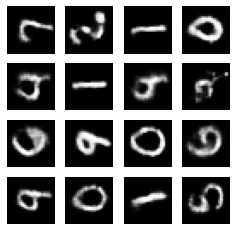

In [1214]:
r_mean, r_log = model.encode(test_images)
theta = np.radians(110)
z = model.reparameterize(r_mean, r_log)
c, s = np.cos(theta), np.sin(theta)
r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
r_x = model.sample(rota_z)
generate_images(r_x[:16])

In [1244]:
mean, locvar = test.mnist_score(r_x)

In [1246]:
mean

7.071727

In [1280]:
def compute_and_save_mnist_score(model, X, epoch, filePath):
    mean, locvar = model.mnist_score(X)
    df = pd.DataFrame({
        "mean": mean,
        "locvar": locvar
    }, index=[epoch])
    file_dir = "./score/" + filePath
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    if not os.path.isfile(file_dir + '/filename.csv'):
        df.to_csv(file_dir +'/filename.csv')
    else:  # else it exists so append without writing the header
        df.to_csv(file_dir + '/filename.csv', mode='a', header=False)

In [1286]:
classifier = Classifier(shape=(28, 28, 1))
classifier_path = checkpoint_path = "./beta_VAE/checkpoints/classifier"
cls = tf.train.Checkpoint(classifier = classifier)
cls_manager = tf.train.CheckpointManager(cls, classifier_path, max_to_keep=5)
if cls_manager.latest_checkpoint:
    cls.restore(cls_manager.latest_checkpoint)
    print('classifier checkpoint restored!!')

classifier checkpoint restored!!


In [1291]:
base_line_mean, base_line_std = classifier.mnist_score(r_images)
print(base_line_mean)

9.827609


In [1290]:
r_images

<tf.Tensor: shape=(10000, 28, 28, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
  